# load data

In [19]:
from datasets import load_dataset

hf_dataset = load_dataset("community-datasets/yahoo_answers_topics", split="train")
hf_dataset

Dataset({
    features: ['id', 'topic', 'question_title', 'question_content', 'best_answer'],
    num_rows: 1400000
})

In [20]:
hf_dataset[:5]

{'id': [0, 1, 2, 3, 4],
 'topic': [4, 5, 2, 6, 6],
 'question_title': ["why doesn't an optical mouse work on a glass table?",
  'What is the best off-road motorcycle trail ?',
  'What is Trans Fat? How to reduce that?',
  'How many planes Fedex has?',
  'In the san francisco bay area, does it make sense to rent or buy ?'],
 'question_content': ['or even on some surfaces?',
  'long-distance trail throughout CA',
  'I heard that tras fat is bad for the body.  Why is that? Where can we find it in our daily food?',
  'I heard that it is the largest airline in the world',
  'the prices of rent and the price of buying does not make sense to me, mostly the rent will not cover the mortgage . Is it better to rent a house or to buy?'],
 'best_answer': ['Optical mice use an LED and a camera to rapidly capture images of the surface beneath the mouse.  The infomation from the camera is analyzed by a DSP (Digital Signal Processor) and used to detect imperfections in the underlying surface and determ

## convert to pandas

In [21]:
df_pandas = hf_dataset.to_pandas()
df_pandas.head()

,id,topic,question_title,question_content,best_answer
0,0,4,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,1,5,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,2,2,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...
3,3,6,How many planes Fedex has?,I heard that it is the largest airline in the ...,according to the www.fedex.com web site:\nAir ...
4,4,6,"In the san francisco bay area, does it make se...",the prices of rent and the price of buying doe...,renting vs buying depends on your goals. <br /...


## mapear classe

In [22]:
topic_labels = {
    0: "Society & Culture",
    1: "Science & Mathematics",
    2: "Health",
    3: "Education & Reference",
    4: "Computers & Internet",
    5: "Sports",
    6: "Business & Finance",
    7: "Entertainment & Music",
    8: "Family & Relationships",
    9: "Politics & Government"
}

In [23]:
df_pandas["topic_name"] = df_pandas["topic"].map(topic_labels)
df_pandas["topic_name"]

0          Computers & Internet
1                        Sports
2                        Health
3            Business & Finance
4            Business & Finance
                   ...         
1399995                  Health
1399996      Business & Finance
1399997                  Health
1399998       Society & Culture
1399999    Computers & Internet
Name: topic_name, Length: 1400000, dtype: object

## criar sample

In [24]:
df_copy = df_pandas.sample(n=500)
df_copy.shape

(500, 6)

In [25]:
df_copy.head()

,id,topic,question_title,question_content,best_answer,topic_name
425081,425081,1,Why do the Brits think that they themselves ar...,,"They are very weird, and only they can relate ...",Science & Mathematics
178235,178235,6,I love my boyfride but he don't love me why.?,My boyfriend say that i did not complet school.,if he doesnt love you just because of that the...,Business & Finance
30157,30157,4,how do I check the sound card on my computer? ...,,"If you go to your sound options, there should ...",Computers & Internet
1396071,1396071,5,"first century,hat-tirck,wicket taken in cricke...","which Indian player,against which country,when...",First Centurion in Tests : In India ---- Lal...,Sports
413163,413163,5,hank aaron timeline 2006?,,"wake up - drink orange juice, read paper, thin...",Sports


# Eda

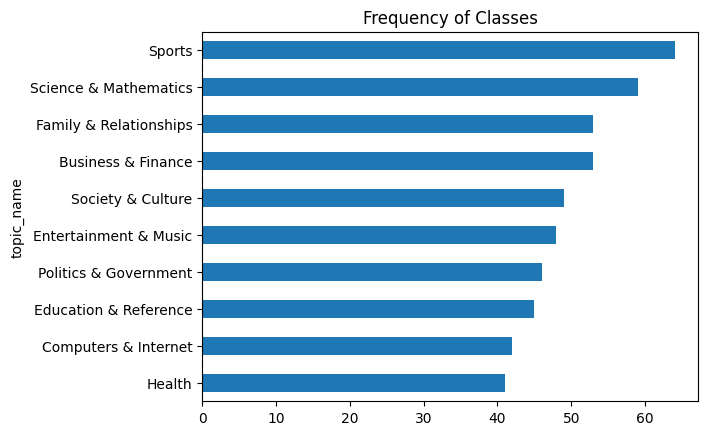

In [26]:
import matplotlib.pyplot as plt


df_copy["topic_name"].value_counts(ascending=True).plot.barh()

plt.title("Frequency of Classes")
plt.show()

## Bow

In [27]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = np.array(["The sun is ...", "The water is but the sun...", "Sun water"])
docs

array(['The sun is ...', 'The water is but the sun...', 'Sun water'],
      dtype='<U27')

In [28]:
bag = count.fit_transform(docs)
bag

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (3, 5)>

In [29]:
print(count.vocabulary_)

{'the': 3, 'sun': 2, 'is': 1, 'water': 4, 'but': 0}


In [30]:
print(bag.toarray())

[[0 1 1 1 0]
 [1 1 1 2 1]
 [0 0 1 0 1]]


## tfidf

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True, norm="l2", smooth_idf=True)

np.set_printoptions(precision=2)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())

[[0.   0.62 0.48 0.62 0.  ]
 [0.46 0.35 0.27 0.69 0.35]
 [0.   0.   0.61 0.   0.79]]


## Cleaning Data

In [32]:
df_copy

,id,topic,question_title,question_content,best_answer,topic_name
425081,425081,1,Why do the Brits think that they themselves ar...,,"They are very weird, and only they can relate ...",Science & Mathematics
178235,178235,6,I love my boyfride but he don't love me why.?,My boyfriend say that i did not complet school.,if he doesnt love you just because of that the...,Business & Finance
30157,30157,4,how do I check the sound card on my computer? ...,,"If you go to your sound options, there should ...",Computers & Internet
1396071,1396071,5,"first century,hat-tirck,wicket taken in cricke...","which Indian player,against which country,when...",First Centurion in Tests : In India ---- Lal...,Sports
413163,413163,5,hank aaron timeline 2006?,,"wake up - drink orange juice, read paper, thin...",Sports
...,...,...,...,...,...,...
1230436,1230436,7,how much does an original pacman game cost?,,It depends if its a pc or xbox game. Usually p...,Entertainment & Music
1344065,1344065,6,"I have $30,000.00 in a savings account. Where...",,"There really is no ""safe"" place to put the mon...",Business & Finance
506973,506973,3,Tel me about earth planet?,,we are destroying it!. we take and take and gi...,Education & Reference
1384331,1384331,5,who were the catchers on the 1967 1968 1969 ne...,,jerry grote was the starter in all 3 years you...,Sports


In [33]:
#df_copy.loc[1063793, "question_content"][-50:]

In [34]:
import re
def preprocessor(text):
    text = (re.sub(r'[\W]+', ' ', text.lower()))
    return text

In [35]:
df_copy["question_content"] = df_copy["question_content"].apply(preprocessor)
df_copy["question_content"]

425081                                                      
178235       my boyfriend say that i did not complet school 
30157                                                       
1396071    which indian player against which country when...
413163                                                      
                                 ...                        
1230436                                                     
1344065                                                     
506973                                                      
1384331                                                     
421599     in terms of linguistical differences or differ...
Name: question_content, Length: 500, dtype: object

## Processing Tokens

In [36]:
def tokenizer(text):
    return text.split()

tokenizer("runners like running.")

['runners', 'like', 'running.']

In [37]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

stemming

In [38]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tokenizer_porter('runners like running and thus they run')

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']

stop words

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Seu
[nltk_data]     Computador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords


stop = stopwords.words("english")
[w for w in tokenizer_porter("a runner likes running and runs a lot") if w not in stop]

['runner', 'like', 'run', 'run', 'lot']

## Trainig A logit Model

In [41]:
from sklearn.model_selection import train_test_split

X = df_copy["question_content"]
y = df_copy["topic"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)

(335,) (335,)


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

"""
param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]
"""

small_param_grid = [{'vect__ngram_range': [(1, 1)],
                     'vect__stop_words': [None],
                     'vect__tokenizer': [tokenizer, tokenizer_porter],
                     'clf__penalty': ['l2'],
                     'clf__C': [1.0, 10.0]},
                    {'vect__ngram_range': [(1, 1)],
                     'vect__stop_words': [stop, None],
                     'vect__tokenizer': [tokenizer],
                     'vect__use_idf':[False],
                     'vect__norm':[None],
                     'clf__penalty': ['l2'],
                  'clf__C': [1.0, 10.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(solver='liblinear'))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, small_param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [43]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\Seu Computador\Documents\Github\TaggingYahooWithBow\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Seu Computador\Documents\Github\TaggingYahooWithBow\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,estimator,Pipeline(step...liblinear'))])
,param_grid,"[{'clf__C': [1.0, 10.0], 'clf__penalty': ['l2'], 'vect__ngram_range': [(1, ...)], 'vect__stop_words': [None], ...}, {'clf__C': [1.0, 10.0], 'clf__penalty': ['l2'], 'vect__ngram_range': [(1, ...)], 'vect__norm': [None], ...}]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [44]:
print(f'Best parameter set: {gs_lr_tfidf.best_params_}')
print(f'CV Accuracy: {gs_lr_tfidf.best_score_:.3f}')

Best parameter set: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x000001DCF1C116C0>}
CV Accuracy: 0.224


In [55]:
clf = gs_lr_tfidf.best_estimator_
# print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')
acc = clf.score(X_test, y_test)
acc

0.20606060606060606

In [46]:
pred = clf.predict(["How to import libs using Python"])
pred

array([6])

In [47]:
label = topic_labels[pred[0]]
print(label)

Business & Finance


In [48]:
import mlflow

In [65]:
clf1 = LogisticRegression()

In [69]:
import mlflow
from mlflow.models import infer_signature
mlflow.set_tracking_uri("http://127.0.0.1:5000")

with mlflow.start_run(run_name="BOW"):
    mlflow.log_params(small_param_grid[0])
    mlflow.log_metric("accuracy", acc)

    signature=infer_signature(X_train, clf.predict(X_train))

    model_info=mlflow.sklearn.log_model(
        sk_model=clf,
        name="bow",
        signature=signature,
        input_example=np.array(X_train),
        registered_model_name="tracking"
    )


2025/11/01 19:37:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Successfully registered model 'tracking'.
2025/11/01 19:37:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking, version 1
Created version '1' of model 'tracking'.


🏃 View run BOW at: http://127.0.0.1:5000/#/experiments/0/runs/a223d5994d3346d880ff56a952c78d7a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
